# **Lab 3 (b)**
### Weightage 3.6%
# Convolutional Neural Networks
---
Dataset used: Cats Vs. Dogs

---



Maximum Points in the Lab: 90

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **March 20th 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In this part of your Lab 3, you will be using Convolutional Neural Network to classify whether a given image contains a Cat or a Dog. You can use the tensorflow package for this implementation. The Cats and Dogs dataset from the famous Kaggle contest which is filtered and available at tensorflow can be used.

In [1]:
# Import the necessary libraries
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random
from sklearn.metrics import confusion_matrix

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

TensorFlow 1.x selected.


# Data loading and Preprocessing

---


The following blocks downloads the dataset stored at tensorflow and extracts them to be used to train the CNN model. **Please don't make any changes to these blocks below.**

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 0s 0us/step


The dataset has the following directory structure:

<pre>
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [3]:
train_dir_path = os.path.join(PATH, 'train')
validation_dir_path = os.path.join(PATH, 'validation')

train_cats_dir_path = os.path.join(train_dir_path, 'cats')  
train_dogs_dir_path = os.path.join(train_dir_path, 'dogs') 
validation_cats_dir_path = os.path.join(validation_dir_path, 'cats')  
validation_dogs_dir_path = os.path.join(validation_dir_path, 'dogs')  
print(PATH)

/root/.keras/datasets/cats_and_dogs_filtered


## Create a labelled test set from the validation set
As you would have seen we have only training and validation sets with labels as the ground truth labels for the Kaggle contest test set images is not public. Hence we shall consider 10% of validation data (5% Cats, 5% Dogs)  as our test set. 


In [0]:
# Create a test directory with the same Cats and Dogs sub directory structure 
test_dir_path = os.path.join(PATH, 'labelled_test')
if not  os.path.exists(test_dir_path):
    os.makedirs(test_dir_path)
test_cats_dir_path = os.path.join(test_dir_path,'cats')
test_dogs_dir_path = os.path.join(test_dir_path,'dogs')
if not os.path.exists(test_cats_dir_path):
    os.makedirs(test_cats_dir_path)
if not os.path.exists(test_dogs_dir_path):
    os.makedirs(test_dogs_dir_path)

# Randomly pick 5% of validation Cat Images 
val_cat_list = os.listdir(validation_cats_dir_path)
num_cat_test_files = int(0.05 * len(val_cat_list))
chosen_cats = random.sample(val_cat_list,num_cat_test_files)

# Randomly pick 5% of validation Dog Images 
val_dog_list = os.listdir(validation_dogs_dir_path)
num_dog_test_files = int(0.05 * len(val_dog_list))
chosen_dogs = random.sample(val_dog_list,num_dog_test_files)

# Move the selected Cat Images from Validation Cats directory to Test Cats directory 
for cat in chosen_cats:
    src_path = os.path.join(validation_cats_dir_path,cat)
    if not os.path.exists(os.path.join(test_cats_dir_path,cat)):
        shutil.move(src_path,test_cats_dir_path)

# Move the selected Dog Images from Validation Dogs directory to Test Dogs directory 
for dog in chosen_dogs:
    src_path = os.path.join(validation_dogs_dir_path,dog)
    if not os.path.exists(os.path.join(test_dogs_dir_path,dog)):
        shutil.move(src_path,test_dogs_dir_path)  


In [0]:
num_cats_train =  len(os.listdir(train_cats_dir_path))
num_dogs_train =  len(os.listdir(train_dogs_dir_path))
num_cats_val =  len(os.listdir(validation_cats_dir_path))
num_dogs_val =  len(os.listdir(validation_dogs_dir_path))
num_cats_test =  len(os.listdir(test_cats_dir_path))
num_dogs_test =  len(os.listdir(test_dogs_dir_path))

total_train_data = num_cats_train + num_dogs_train
total_val_data = num_cats_val + num_dogs_val
total_test_data = num_cats_test + num_dogs_test

The images are of different sizes, but our machine learning model requires input images to be of a fixed size. Let us decide an input size 200 x 200.

In [0]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

# Generate Image Batches


---


As images are high dimensional, fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**5 Points**

a. featurewise_center: Feature-wise set input mean to zero over the dataset. (Boolean value).

b. samplewise_center: Set each sample mean to zero. (Boolean value).

c. featurewise_std_normalization: Feature-wise divide inputs by std of the dataset. (Boolean value).

d. samplewise_std_normalization: Divide each input by its std. (Boolean value).

e. zca_epsilon: epsilon by ZCA whitening. (default 1e-6).

f. zca_whitening: Whether apply ZCA whitening. (Boolean value).

g. rotation_range: Degree range for random rotations. (Int value).

h. width_shift_range: float, i-D array-like, int
    float: fraction of total width, if < 1, or pixels if >= 1.
    1-D array-like: random elements from the array.
    int: integer number of pixels from interval (-width_shift_range, +width_shift_range)
    
i. height_shift_range: float, 1-D array-like, int
    float: fraction of total height, if < 1, or pixels if >= 1.
    1-D array-like: random elements from the array.
    int: integer number of pixels from interval (-height_shift_range, +height_shift_range)
    
j. brightness_range: Range for picking a brightness shift value.

k. shear_range: Shear intensity. Shear angle in counter-clockwise direction in degrees.

l. zoom_range: range for random zoom.

m. channel_shift_range: Set the range for random channel shifts.

n. fill_mode: Points outside the boundaries of the input are filled according to one of 'constant', 'nearest', 'reflect' or 'wrap'.

o. cval: Value for points outside boundaries when fill_mode = constant.

p. horizontal_flip: Randomly flip inputs horizontally. (Boolean value).

q. vertical_flip: Randomly flip inputs vertically. (Boolean value).

r. rescale: set the rescaling factor.

s. preprocessing_function: Function that will be applied to each input after the input is resized and augmented.

t. data_format: Image data format, either "channels_first" or "channels_last". "channels_last" mode means that the images should have shape (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width).

u. validation_split: Fraction of images reserved for validation.

v. dtype: Dtype to use for the generated arrays.



---




Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**5 Points**

a. directory: path to the target directory. (String value).

b. target_size: Set the dimensions to which all images found will be resized.

c. color_mode: Whether images will be converted to 1 (grayscale), 3 (rgb) or 4 (rgba) channels.

d. classes: Optional list of class subdirectories.

e. class_mode: Determines the type of label arrays that are returned.

f. batch_size: set the batches of data.

g. shuffle: Whether to shuffle the data or not.

h. seed: Random seed for shuffling and transformation.

i. save_to_dir: Optionally specify a directory to which to save the augmented pictures being generated.

j. save_prefix: prefix to use for filenames of saved pictures.

k. save_format: One of 'png' or 'jpeg'.

l. follow_links: Whether to follow symlinks inside class subdirectories.

m. subset: Subset of data 'training' or 'validation'.

n. interpolation: Interpolation method used to resample the image if the target size is different from that of the loaded image.
---

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train, validation or test directories.



---

**5 Points**


---




In [0]:
def get_generator(directory_path, batch_size_):
    # Insert your code here
    data_batch_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
    data_batch_generator = data_batch_generator.flow_from_directory(
        directory=directory_path,
        target_size=(200, 200),
        batch_size=batch_size_,
        class_mode="binary",
        shuffle=True,
        seed=42
    )

    return data_batch_generator

Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[5 Points]**
    
    a. layer: layer instance. (Used to add a layer instance on top of the layer stack).

2. compile() **[5 Points]**
    
    a. optimizer: name of optimizer or optimizer instance.
    
    b. loss: name of objective function, objective function or tf.keras.losses.Loss instance.
    
    c. metrics: list of metrics to be evaluated by the model during training and testing.
    
    d. loss_weights: Optional list or dictionary specifying scalar coefficients to weight the loss contributions of different model outputs.
    
    e. sample_weight_mode: If need to do timestep-wise sample weighting, set this to "temporal".
    
    f. weighted_metrics: List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
    
    g. target_tensors: If we like to use own target tensors then they can be specified via target_tensors argument.

3. fit() **[5 Points]**
    
    a. x: Input data.
    
    b. y: Target data.
    
    c. batch_size: Number of samples per gradient update.
    
    d. epochs: Number of epochs to train the model.
    
    e. verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch.
    
    f. callbacks: List of callbacks to apply during training.
    
    g. validation_split: Fraction of the training data to be used as validation data.
    
    h. validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
    
    i. shuffle: Whether to shuffle the training data before each epoch. (Boolean type).
    
    j. class_weight: Optional dictionary mapping class indices to a weight value, used for weighting the loss function during training.
    
    k. sample_weight: Optional Numpy array of weights for the training samples, used for weighting the loss function during training.
    
    l. initial_epoch: Epoch at which to start training.
    
    m. steps_per_epoch: Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
    
    n. validation_steps: Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
    
    o. validation_freq: Specifies how many training epochs to run before a new validation run is performed.
    
    p. max_queue_size: Maximum size for the generator queue.
    
    q. workers: Maximum number of processes to spin up when using process-based threading.
    
    r. use_multiprocessing: If True, use process-based threading. If unspecified, use_multiprocessing will default to False.


4. predict()  **[5 Points]**
    
    a. x: Input samples.
    
    b. batch_size: Number of samples per gradient update.
    
    c. verbose: Verbosity mode, 0 or 1.
    
    d. steps: Total number of steps before declaring the prediction round finished.
    
    e. callbacks: List of callbacks to apply during prediction.
    
    f. max_queue_size: Maximum size for the generator queue.
    
    g. workers: Maximum number of processes to spin up when using process-based threading. (Default = 1).
    
    h. use_multiprocessing: If True, use process-based threading. If unspecified, use_multiprocessing will default to False.


Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[5 Points]**
    
    a. filters: Dimensionality of the output space.
    
    b. kernel_size: Specify height and  width of the 2D convolution window.
    
    c. strides: Specify the strides of the convolution along height and width.
    
    d. padding: one of 'valid' or 'same'.
    
    e. data_format: Ordering of dimensions in the inputs.
    
    f. dilation_rate: Specify the dilation rate to use for dilated convolution.
    
    g. activation: Activation function to use. (Default: linear).
    
    h. use_bias: Whether the layer uses a bias vector. (Boolean value).
    
    i. kernel_initialiser: Initialiser for the kernel weights matrix.
    
    j. bias_initializer: Initializer for the bias vector.
    
    k. kernel_regularizer: Regularizer function applied to the kernel weights matrix.
    
    l. bias_regularizer: Regularizer function applied to the bias vector.
    
    m. activity_regularizer: Regularizer function applied to the output of the layer.
    
    n. kernel_constraint: Constraint function applied to the kernel matrix.
    
    o. bias_constraint: Constraint function applied to the bias vector.

2. MaxPooling2D() **[5 Points]**
    
    a. pool_size: Factors by which to downsacle.
    
    b. strides: Stride values. (Default value = pool_size).
    
    c. padding: One of 'valid' or 'same'.
    
    d. data_format: The ordering of the dimensions in the inputs.

3. Flatten()  **[5 Points]**
    
    a. data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs.

4. Dense()  **[5 Points]**
    
    a. units: Positive integer, dimensionality of the output space.
    
    b. activation: Activation function to use.
    
    c. use_bias: Whether the layer uses a bias vector. (Boolean value).
    
    d. kernel_initializer: Initializer for the kernel weights matrix.
    
    e. bias_initializer: Initializer for the bias vector.
    
    f. kernel_regularizer: Regularizer function applied to the kernel weights matrix.
    
    g. bias_regularizer: Regularizer function applied to the bias vector.
    
    h. activity_regularizer: Regularizer function applied to the output of the layer.
    
    i. kernel_constraint: Constraint function applied to the kernel weights matrix.
    
    j. bias_constraint: Constraint function applied to the bias vector.

5. Dropout() **[5 Points]**
    
    a. rate: Fraction of the input units to drop.
    
    b. noise_shape: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input.
    
    c. seed: A Python integer to use as random seed.



# Defining the model architecture

---



We have defined our CNN model architecture here. **Please dont make any changes to the two blocks below.**

In [0]:
def build_cnn_model(dropout_probability = 0):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
#  Variables needed for subsequent sections

num_epochs = 5
# In binary mode cat is encoded as 0 and dog as 1. The below list shall be used to decode in order to get a human readable label.
labels = ["Cat","Dog"] 

# Best Batch size determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are batch size and dropout probability. We shall start with the  experimentation of **batch size**. Discuss the impact of batch size on model training and performance.


---
**5 Points**

Batch Size determines the number of samples propagated through a network at a time. When we take the batch size to be small, then the model's estimate of gradients will be less accurate, and the model will wander instead of reaching the minima directly. But smaller batches will be more efficent to compute.

When the batch size is large, the number of steps required to converge reduces as on each step we know the exact gradient to the minima. But it is computationally inefficient.Also, it has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize.

---




In [0]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []

    # Insert your code here to build a CNN model with the default dropout probability
    model = build_cnn_model()
    
    for bsize in batch_sizes:
        
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        train_generator = get_generator(train_dir_path, bsize)
        validation_generator = get_generator(validation_dir_path, bsize)
        
        # Insert your code here to train the CNN model using the training set and validate using the validation set
        model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=num_epochs   
        )
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        avg_val_accuracies.append(model.evaluate_generator(generator=validation_generator)[1]) # 1st

    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    print(avg_val_accuracies)

    best_batch_index_value = max(avg_val_accuracies)
    best_batch_index = avg_val_accuracies.index(best_batch_index_value)
    return batch_sizes[best_batch_index]

# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()
print("Best Batch Size : " , best_batch_size)

Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
Epoch 1/5
125/125 [==============================] - 10s 77ms/step - loss: 0.6925 - acc: 0.5215 - val_loss: 0.6869 - val_acc: 0.5005
Epoch 2/5
125/125 [==============================] - 9s 71ms/step - loss: 0.6832 - acc: 0.5525 - val_loss: 0.6785 - val_acc: 0.5801
Epoch 3/5
125/125 [==============================] - 9s 70ms/step - loss: 0.6759 - acc: 0.5735 - val_loss: 0.6643 - val_acc: 0.6010
Epoch 4/5
125/125 [==============================] - 9s 70ms/step - loss: 0.6659 - acc: 0.6030 - val_loss: 0.6523 - val_acc: 0.6147
Epoch 5/5
125/125 [==============================] - 9s 70ms/step - loss: 0.6568 - acc: 0.5955 - val_loss: 0.6632 - val_acc: 0.6094
Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
Epoch 1/5
63/63 [==============================] - 10s 151ms/step - loss: 0.6403 - acc: 0.6405 - val_loss: 0.6397 - val_acc: 0.6492
Epoch 2/5
63/63 [========================

# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**

Dropout is a regularization technique, and is most effective at preventing overfitting. 

Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons. With H hidden units, each of which can be dropped, we have 2^H possible models. So, dropout increases performance.

When the network is small relative to the dataset, regularization is usually unnecessary. Hence, much dropout probability will hurt performance. 

---


In [0]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []


    # Insert your code here to get generators that fetch batches from train and validation directories as per best batch size
    train_generator = get_generator(train_dir_path, best_batch_size)
    validation_generator = get_generator(validation_dir_path, best_batch_size)
    

    for prob in dropout_probs:
        
        
        # Insert your code here to build a CNN model with the current dropout probability
        model = build_cnn_model(prob)

        # Insert your code here to train the CNN model using the training set and validate using the validation set
        
        # Insert your code here to train the CNN model using the training set and validate using the validation set
        model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=num_epochs   
        )
       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        avg_val_accuracies.append(model.evaluate_generator(generator=validation_generator)[1])
        

    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    best_dropout_index_value = max(avg_val_accuracies)
    best_dropout_index = avg_val_accuracies.index(best_dropout_index_value)
    return dropout_probs[best_dropout_index]



    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()
print("Best DropOut Probability : " , best_prob)

Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
Epoch 1/5
63/63 [==============================] - 10s 156ms/step - loss: 0.6937 - acc: 0.5085 - val_loss: 0.6878 - val_acc: 0.5571
Epoch 2/5
63/63 [==============================] - 9s 140ms/step - loss: 0.6873 - acc: 0.5445 - val_loss: 0.6860 - val_acc: 0.5330
Epoch 3/5
63/63 [==============================] - 9s 137ms/step - loss: 0.6838 - acc: 0.5565 - val_loss: 0.6804 - val_acc: 0.5351
Epoch 4/5
63/63 [==============================] - 9s 136ms/step - loss: 0.6797 - acc: 0.5760 - val_loss: 0.6870 - val_acc: 0.5288
Epoch 5/5
63/63 [==============================] - 8s 135ms/step - loss: 0.6735 - acc: 0.5815 - val_loss: 0.6680 - val_acc: 0.5979
[0.59790576]
Epoch 1/5
63/63 [==============================] - 10s 156ms/step - loss: 0.6916 - acc: 0.5110 - val_loss: 0.6944 - val_acc: 0.4995
Epoch 2/5
63/63 [==============================] - 9s 137ms/step - loss: 0.6868 - acc: 0.5455 - val_loss: 0.6805 - v

NameError: ignored

# Images Visualization

---


Now we shall train our CNN model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [0]:
def visualize_image(img):
    
    img = img*255
    # Insert your code here to visualize a given image
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2_imshow(RGB_img)

    

# Make generators ready

---

Create generators to fetch batches from train, test and validation directories. You may use best batch size determined earlier.



---
**3 Points**


---




In [9]:
# Insert your code here to create generators that fetch batches of size best_batch_size (determined earlier) from train, validation and test directories

train_generator = get_generator(train_dir_path, best_batch_size)
test_generator = get_generator(test_dir_path, best_batch_size)
validation_generator = get_generator(validation_dir_path, best_batch_size)



Found 2000 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


# Visualize training images

---

To get an understanding of the data fetch a training batch and visualize any 5 training images along with their labels. 



---

**Note**: In binary mode, ImageDataGenerator encodes Cats as 0 and Dogs as 1.

---




---

**2 Points**

---



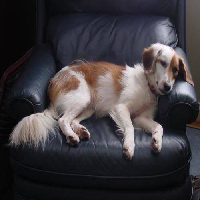

Dog



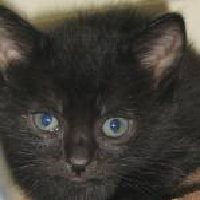

Cat



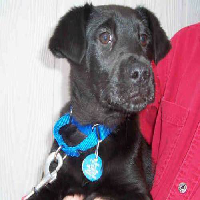

Dog



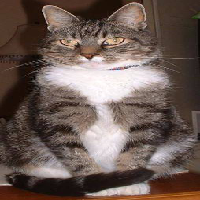

Cat



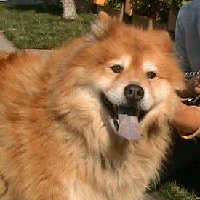

Dog



In [10]:
# Insert your code here to obtain a sample training images batch from the train directory generator

training_img = train_generator[0][0] # array of images of first batch 
training_img_labels = train_generator[0][1] # Array of labels of First Batch
# 
for i in range(5):
    # Insert your code here to visualize the training images
    # print(train_generator[0][0][i].shape)
    visualize_image(training_img[i])
    if( training_img_labels[i] == 0) :
        print ("Cat\n")
    else:
        print ("Dog\n")
    # Insert your code here to print corresponding training label: Cat / Dog
    

    

# Build Model

---
Now build the model as per the best dropout probability value determined earlier. Summarize the model architecture.

---

**2 Points**

---




In [0]:
# Insert your code here to build the CNN model as per the best dropout probability value determined earlier

model = build_cnn_model(dropout_probability=best_prob)

# Insert your code here to print the model summary
model.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 67712)           

# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**

On increasing the number of epochs, the model becomes more capable of fitting complex data, and the accuracy of the model increases, and loss decreases. Too many epochs may also make the model overfitted, hence the accuracy validation set decreased further. 

---



Epoch 1/5
100/100 [==============================] - 14s 135ms/step - loss: 0.6919 - acc: 0.5170 - val_loss: 0.6829 - val_acc: 0.5979
Epoch 2/5
100/100 [==============================] - 12s 123ms/step - loss: 0.6804 - acc: 0.5688 - val_loss: 0.6714 - val_acc: 0.5885
Epoch 3/5
100/100 [==============================] - 12s 124ms/step - loss: 0.6723 - acc: 0.5744 - val_loss: 0.6646 - val_acc: 0.5979
Epoch 4/5
100/100 [==============================] - 13s 125ms/step - loss: 0.6600 - acc: 0.6098 - val_loss: 0.6485 - val_acc: 0.6377
Epoch 5/5
100/100 [==============================] - 12s 120ms/step - loss: 0.6549 - acc: 0.5963 - val_loss: 0.6418 - val_acc: 0.6450


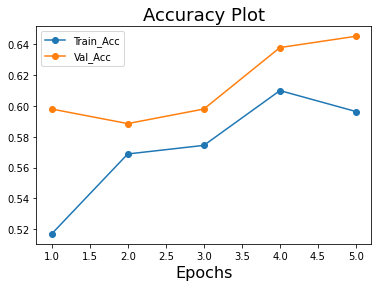

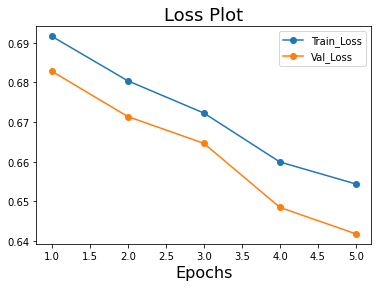

In [0]:
# Insert your code here to train the CNN model with best hyperparameter settings using training set and validate using the validation set (1 Point)
train_history = model.fit_generator(generator=train_generator,validation_data=validation_generator,epochs=num_epochs, steps_per_epoch=100)


# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
train_acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs_list = list(range(1,len(val_acc) + 1))



def plot_(y_axis_values_a, y_axis_values_b , x_axis_values ,xlabel, ylabel_a ,ylabel_b , title):
    fig = plt.figure()
    ax=fig.add_subplot(111)
    plt.title( title , fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    # plt.ylabel(ylabel, fontsize=16)
    ax.plot(x_axis_values, y_axis_values_a, marker = "o" , label=ylabel_a)
    ax.plot(x_axis_values, y_axis_values_b , marker = "o" , label= ylabel_b)
    plt.legend(loc='best')
    plt.show()    
     


# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plot_( train_acc, val_acc , epochs_list, "Epochs" , "Train_Acc" , "Val_Acc" , "Accuracy Plot" )


# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plot_( train_loss, val_loss , epochs_list, "Epochs" , "Train_Loss" , "Val_Loss" , "Loss Plot" )




# Prediction

---
Fetch a sample test batch and determine the model's predictions on this batch of test images. Generate a confusion matrix and comment on the prediction statistics.



---

**Note**: Predictions would return the probability of the image belonging to class 1 (Dog). If this value is more than 0.5, assign class 1 (Dog) as the prediction. Else, assign class 0(Cat) as the prediction.

---
**2 Points**

#Prediction Statistics
---





In [0]:
# Insert your code here to obtain a sample test images batch from the test directory generator
def labeller_string (X): # Probability to class label
    if(X[0] > 0.5 ):
        return "Dog"
    else:
        return "Cat"


def labeller_class (X): # Probability to class Code
    if(X[0] > 0.5 ): 
        return 1.0
    else:
        return 0.0


test_batch_X = test_generator[0][0]
test_batch_Y = test_generator[0][1]

# Insert your code here to get the model's prediction probabilities
prediction = model.predict(test_batch_X)
# print(prediction)


# Insert your code here to assign class label based on prediction probabilities
labels = list(map(labeller_string , prediction ))
print( labels)
print()

# Insert your code here to print the confusion matrix.
pred_y = list(map( labeller_class ,prediction))
matrix = confusion_matrix(test_batch_Y , pred_y , labels = ["Dog", "Cat"])
print("Confusion Matrix")
print(matrix)




ERROR! Session/line number was not unique in database. History logging moved to new session 59
['Cat', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog']

Confusion Matrix
[[13  7]
 [ 4  8]]


Discuss the **inferences** you obtained from the confusion matrix.


---

**2 Points**
According to Above Confusion matrix 
Out of 32 Samples : 

True Negative : 13   
False Positves : 7  
False Negative : 4  
True Positve : 8  

The model is a a bit biased towards class "Dog".



---

